In [60]:
import re

join_types = ['Merge Join', 'Hash Join', 'Nested Loop']

# Define a regular expression pattern to capture the details of interest from the content
pattern = r'(Merge Join|Hash Join|Nested Loop).*?Scan.*?rows=(\d+).*?Scan.*?rows=(\d+)'

def extract_join_info(file_path):
    # Read the entire file content
    with open(file_path, 'r') as file:
        content = file.read()

    # Find all matches of the pattern in the content
    matches = re.findall(pattern, content, re.DOTALL)

    # Process and print the results
    results = []
    for join_type, rows_first_scan, rows_second_scan in matches:
        if join_type in join_types:
            results.append((join_types.index(join_type), rows_first_scan, rows_second_scan))
    return results

sql_output_10 = extract_join_info('./sql_output_10.txt')
sql_output_400 = extract_join_info('./sql_output_400.txt')
sql_output_500 = extract_join_info('./sql_output_500.txt')
sql_output_10_5a = extract_join_info('./sql_output_10_5_a.txt')
sql_output_10_5b = extract_join_info('./sql_output_10_5_b.txt')
sql_output_500_5a = extract_join_info('./sql_output_500_5_a.txt')
sql_output_500_5b = extract_join_info('./sql_output_500_5_b.txt')


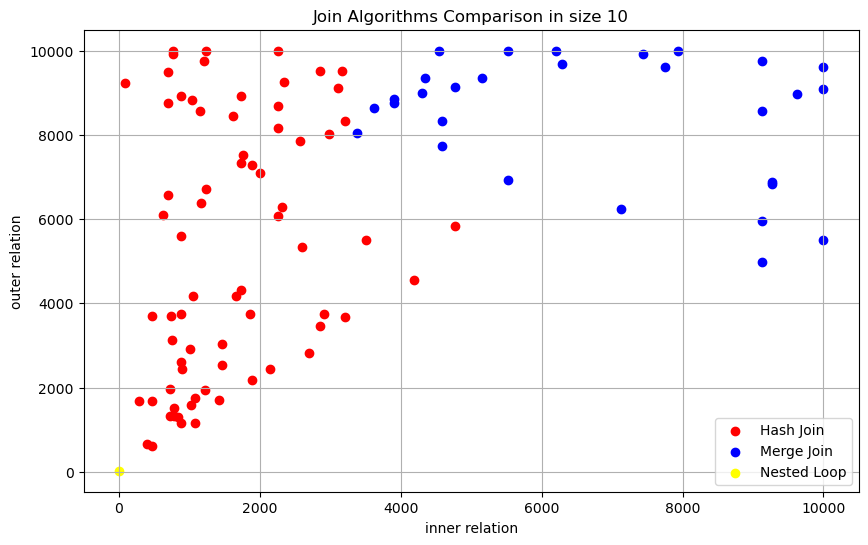

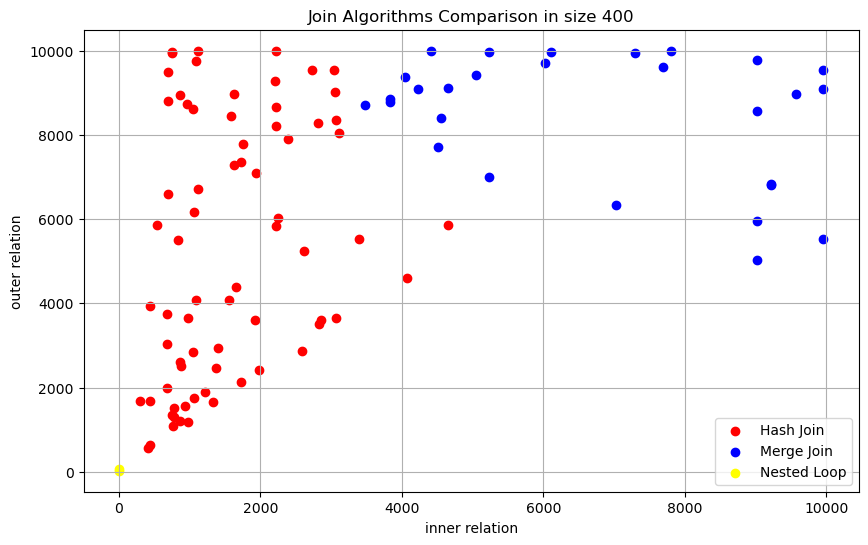

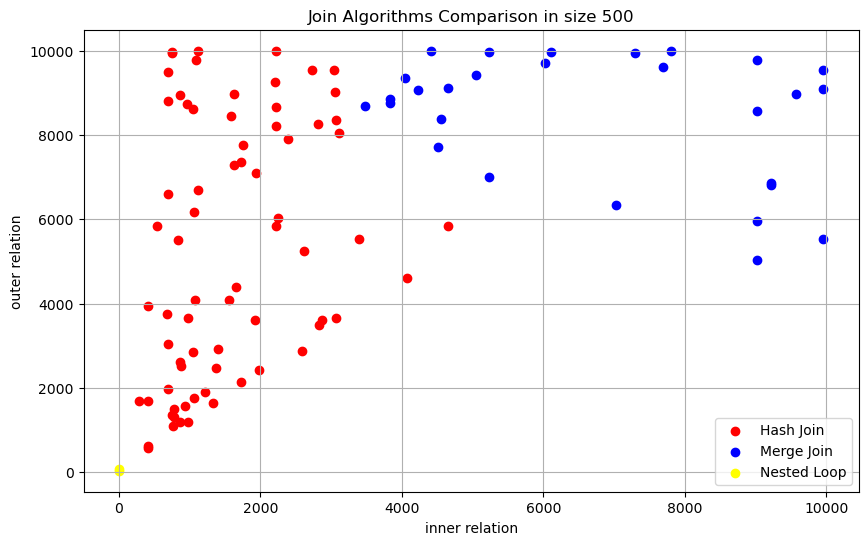

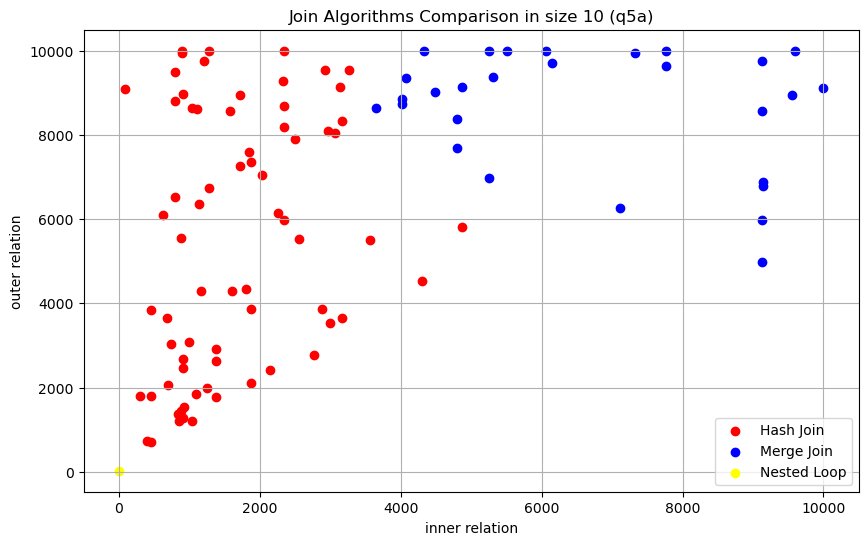

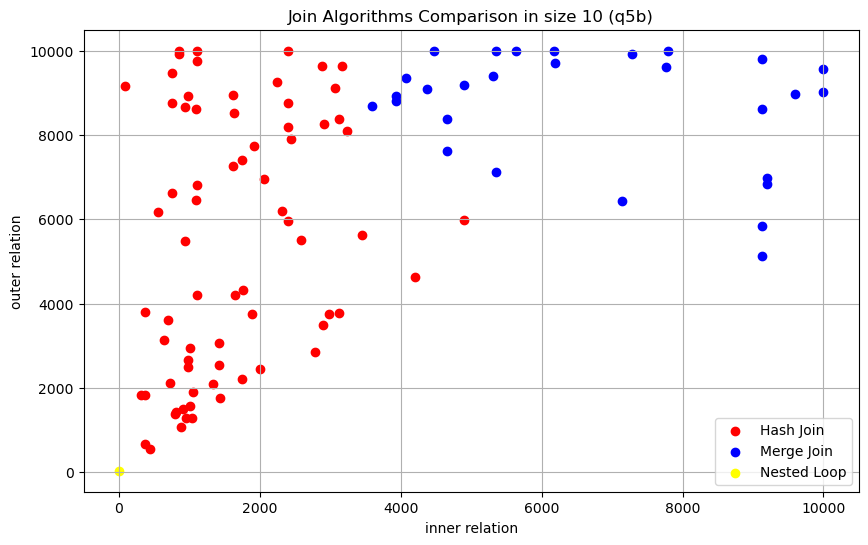

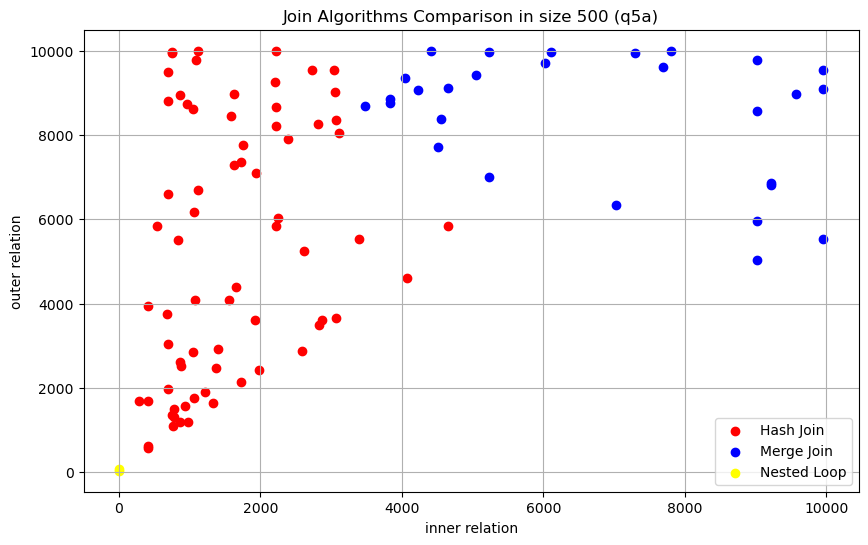

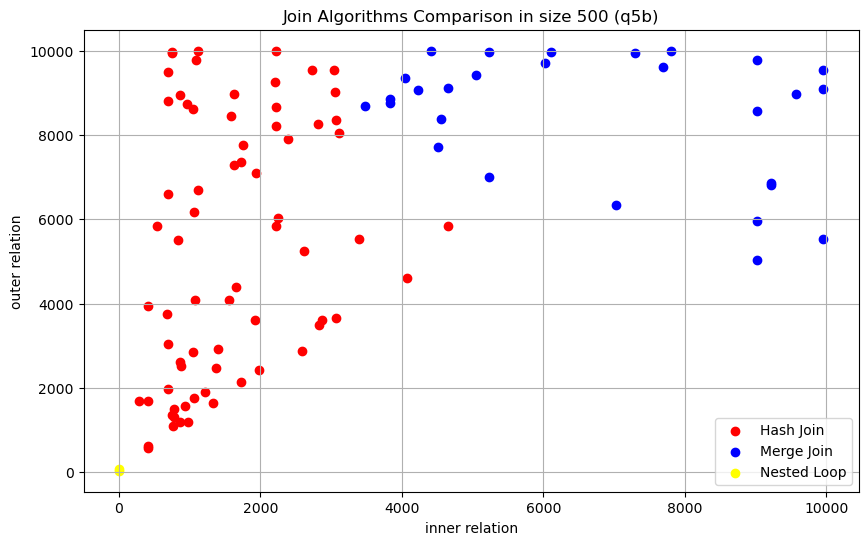

In [64]:
import matplotlib.pyplot as plt

colors = ['blue', 'red', 'yellow']

def draw_graph(data, size):
    # Prepare data
    x_values = []
    y_values = []
    labels = []
    
    for join_type, y, x in data:
        x_values.append(int(x))
        y_values.append(int(y))
        labels.append(join_type)
    
    # Plot
    plt.figure(figsize=(10, 6))
    
    for i, label in enumerate(labels):
        plt.scatter(x_values[i], y_values[i], label=join_types[label] if join_types[label] not in plt.gca().get_legend_handles_labels()[1] else "", color=colors[label])
    
    plt.title(f'Join Algorithms Comparison in size {size}')
    plt.xlabel('inner relation')
    plt.ylabel('outer relation')
    plt.legend()
    plt.grid(True)
    plt.show()

    # plt.tight_layout()
    # filename = f'Join_Algorithms_Comparison_in_size_{size}.png'  # Example filename, change as needed
    # plt.savefig(filename)
    # # Clear the current figure after saving it
    # plt.clf()

draw_graph(sql_output_10, 10)
draw_graph(sql_output_400, 400)
draw_graph(sql_output_500, 500)
draw_graph(sql_output_10_5a, '10 (q5a)')
draw_graph(sql_output_10_5b, '10 (q5b)')
draw_graph(sql_output_500_5a, '500 (q5a)')
draw_graph(sql_output_500_5b, '500 (q5b)')